In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import json
import pandas as pd
from nltk.corpus import stopwords

#Reading json object containing daily news
with open('/content/drive/MyDrive/Colab Notebooks/NLP CBDC/Regression Model/cryptocurrency_news.txt') as f:
    dict = json.load(f)

index = len(dict)
df = pd.DataFrame(dict.items())
df.rename(columns={1:'Day_news',0:'Date'},inplace=True)
df['Day_news'] = df['Day_news'].apply(lambda x:''.join(x))
df.head()

Date                                           Day_news
0  1/1/2016  Bitcoin's Big Challenge in 2016: Reaching 100 ...
1  2/1/2016  CRYPTO20 - First Tokenized Cryptocurrency Inde...
2  3/1/2016  Ethereum Announces the Launch of Homestead - C...
3  4/1/2016  Vatican Slated as First State Adopters of Cryp...
4  5/1/2016  ELSA-GB: Societatea Energetica Electrica SA - ...

In [6]:
from textblob import TextBlob

Polarity = []
for i in df['Day_news']:

    Pol = list(TextBlob(i).sentiment)[0]
    Polarity.append(Pol)
    
df['Sentiment'] = Polarity

dates = []

for i in df['Date']: #Changing format of dates so that we can iterate in yfinance and get the exact price of bitcoin for each data entry
    
    date = '-'.join([i.zfill(2) for i in i.split('/')][::-1])
    dates.append(date)
    
df['Date'] = dates
df['Date'] = df['Date'].astype(str)

with open('/content/drive/MyDrive/Colab Notebooks/NLP CBDC/Regression Model/Dates.txt','w') as f:
    f.writelines(f'{dates}')
    f.close
df.head()

Date                                           Day_news  Sentiment
0  2016-01-01  Bitcoin's Big Challenge in 2016: Reaching 100 ...   0.213095
1  2016-01-02  CRYPTO20 - First Tokenized Cryptocurrency Inde...   0.159226
2  2016-01-03  Ethereum Announces the Launch of Homestead - C...   0.204762
3  2016-01-04  Vatican Slated as First State Adopters of Cryp...   0.243333
4  2016-01-05  ELSA-GB: Societatea Energetica Electrica SA - ...   0.144540

In [8]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.0 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [10]:
import yfinance as yf

ticker = 'BTC-USD'
daily_price = []

price = pd.DataFrame(yf.download(tickers=ticker,interval='1d',start=dates[0],end=dates[-1])['Close'])
price.reset_index(inplace=True)
price['Date'] = price['Date'].astype(str)
price.head()

[*********************100%***********************]  1 of 1 completed


Date       Close
0  2016-01-01  434.334015
1  2016-01-02  433.437988
2  2016-01-03  430.010986
3  2016-01-04  433.091003
4  2016-01-05  431.959991

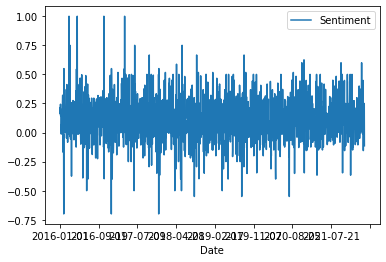

In [18]:
import numpy as np
filtered_prices = []

df_model = pd.DataFrame.merge(df,price,on='Date')
df_model['Day_news'].replace('', np.nan, inplace=True)
df_model.dropna(subset=['Day_news'],inplace= True)
df_model.head(-1)
df_model.plot(x='Date',y=['Sentiment'])

There is no identifiable autoregression. We can use Sentiment to predict price

In [ ]:
dataplot = sb.heatmap(data.corr(), cmap="YlGnBu", annot=True)